

**Programmazione di Applicazioni Data Intensive**  
Laurea in Ingegneria e Scienze Informatiche  
DISI - Università di Bologna, Cesena

Riccardo Marconi, Michele Pio Prencipe

# Descrizione del problema

Il seguente dataset contiene informazioni utili a prevedere la presenza o meno di diabete.
Tali informazioni vengono rilevate da 2000 pazienti. L'obiettivo del progetto è quello di riuscire a realizzare un modello di classificazione che riesca a predire una variabile discreta binaria: **`0`**  nel caso in cui la persona sia non diabetica, **`1`** se la persona è diabetica.

# Analisi Esplorativa
In questa fase vengono analizzate le informazioni presenti nel dataset.

### Importare le librerie
Importiamo le librerie utili per caricare i dati e graficarli.

In [1]:
%matplotlib inline
import os.path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Caricamento dei dati
Tramite la funzione read_csv di pandas vengono caricati e letti i dati dal dataset.

In [2]:
import os.path
if not os.path.exists("diabetes-dataset.csv"):
    from urllib.request import urlretrieve
    urlretrieve("https://bitbucket.org/michtor99/progetto-data-intensive/raw/cc54904002f5ec0d5cb903aeb8845efd2525a25d/diabetes-dataset.csv", "diabetes-dataset.csv")
df = pd.read_csv("https://bitbucket.org/michtor99/progetto-data-intensive/raw/cc54904002f5ec0d5cb903aeb8845efd2525a25d/diabetes-dataset.csv", encoding="latin1")

Eseguendo la seguente cella abbiamo una visualizzazione del DataFrame.

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
df.shape

(2000, 9)

Il dataset contiene 2000 istanze e 9 colonne per le features.

### Analisi delle features

Le features disponibili (come si può osservare dalla rappresentazione del dataset) sono:

- **`Pregnancies`**: Il numero di maternità.

- **`Glucose`**: La quantità del monossaccaride glucosio nel sangue.

- **`BloodPressure`**: La pressione diastolica sanguigna è la forza del sangue che spinge contro le pareti delle arterie. Ogni volta che il tuo cuore batte, pompa (mm Hg).

- **`SkinThickness`**: Spessore della pelle (mm).

- **`Insulin`**: Ormone polipeptidico che regola il metabolismo dei carboidrati, in questo caso si tratta di Insulina sierica dalla durata di 2 ore (mu U/ml).

- **`BMI`**: (Body Mass Index) Indice di massa corporea, rapporto tra peso e altezza (peso in kg/(altezza in m)^2).

   - BMI inferiore a 18,5 = sottopeso.
   - BMI compreso tra 18,5 e 24,9 = normopeso.
   - BMI compreso tra 25 e 29,9 = sovrappeso.
   - BMI compreso tra 30 e 34,9 = 1° grado di obesità.
   - BMI compreso tra 35 e 39,9 = 2° grado di obesità.
   - BMI maggiore di 40 = 3° grado di obesità.

- **`DiabetesPedigreeFunction`**: Funzione del pedigree del diabete (una funzione che valuta la probabilità di diabete in base alla storia familiare).

- **`Age`**: Indica l'età del paziente (anni).

- **`Outcome`**: Variabile di classe (1 se diabetico, 0 se non diabetico).

La variabile target da classificare è **`Outcome`**.

### Utilizzo in memoria e rilevazione dei valori non nulli.

Di seguito troviamo lo spazio occupato in memoria e il tipo di ogni features.

In [5]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


Si può notare che nel dataset tutte le righe presentano dei valori non-null, quindi non risulta necessario trattarli.

### Statistiche dataset

Con l'esecuzione delle seguente cella vengono valutate alcune statistiche del dataset

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


Come si osserva dalla descrizione del dataset, si rilevano la media, il valore massimo, minimo, deviazione standard e i percentili di ogni features.

Si può notare già da una prima analisi delle statistiche che alcuni valori sono "anormali". Ad esempio **`BloodPressure`** minore di 40(mm hg) o maggiore di 110(mm hg) sono valori fuori dalla norma per la pressione sanguigna di una persona, oppure il numero di gravidanze **`Pregnancies`** maggiore di 10, in quanto è poco probabile che un paziente abbia effettuato più di questo numero di gravidanze.

Questi dati fuori dalla norma potrebbero alterare la predizione del modello, saranno quindi esclusi nella successiva fase di Data Cleaning.

### Variabili continue e categoriche
Tutte le variabili sono continue, tranne la variabile dipendente Outcome risulta essere categorica. Di seguito viene visualizzato il numero di valori che ciascuna variabile può assumere.

In [7]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                53
Insulin                     182
BMI                         247
DiabetesPedigreeFunction    505
Age                          52
Outcome                       2
dtype: int64

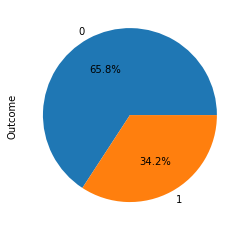

In [8]:
df['Outcome'].value_counts().plot.pie(autopct='%1.1f%%');

Come si nota dal grafico a torta la suddivisione di istanze tra classi è leggermente sbilanciata da una delle due classi rispetto all'altra, quindi potrebbe essere necessario applicare una tecnica di bilanciamento delle classi in una successiva fase.

### Data Exploration
In questa fase andiamo ad analizzare, anche graficamente la distribuzione e la correlazione tra i dati.

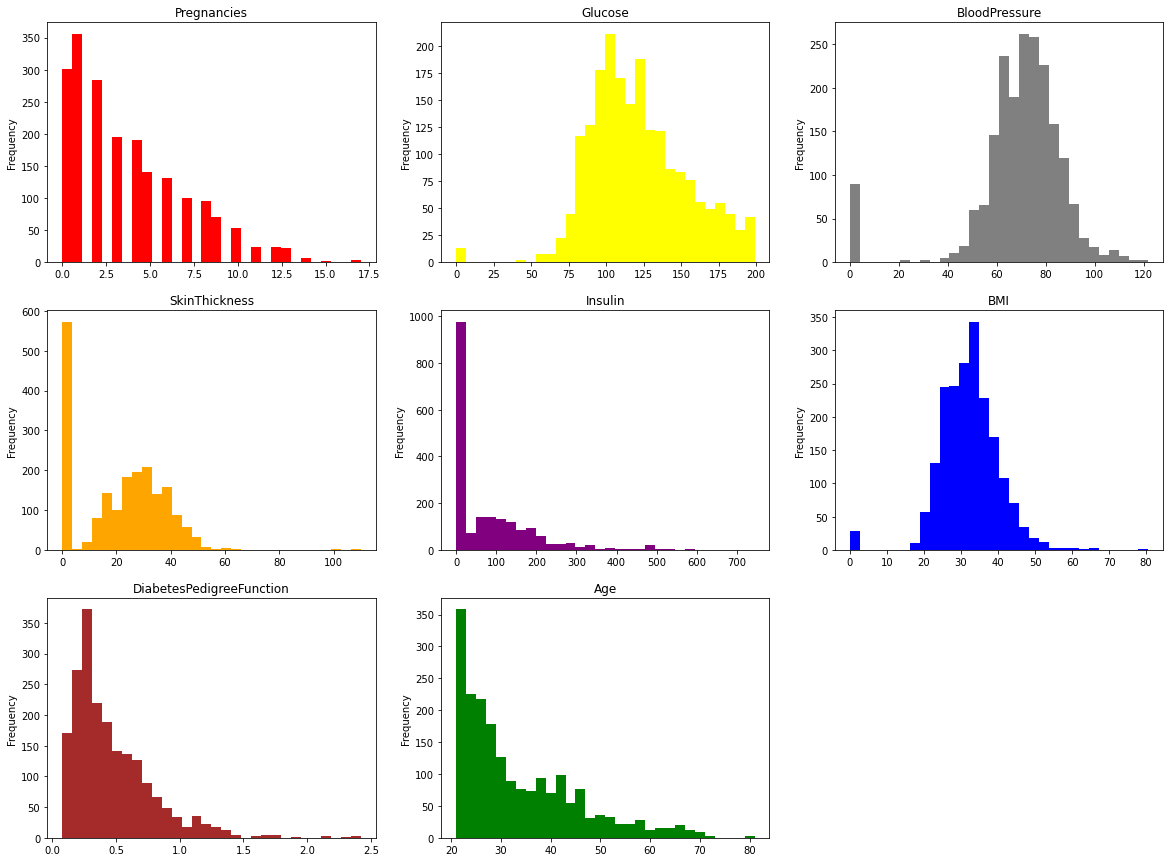

In [9]:
colors = ["red", "yellow", "gray", "orange", "purple", "blue", "brown", "green"]

plt.figure(figsize=(20, 15))
for n, columns in enumerate(df.drop(["Outcome"], axis=1).columns, start=1):
  df[columns].plot.hist(ax=plt.subplot(3,3,n), title=columns, bins=30, color=colors[n-1])

Dai grafici possiamo notare che le features **`Insulin`**, **`DiabetesPedigreeFunction`**, **`Age`** presentano un andamento decrescente all'aumentare del valore sull'asse delle ascisse.

**`Glucose`**, **`BloodPressure`**, **`BMI`** sono distribuiti uniformemente.
 
**`Glucose`**, **`BloodPressure`**, **`SkinThickness`**, **`BMI`** contengono valori 0 che possono essere considerati come outliers.

La maggior parte delle persone è compresa tra i 20 e 45 anni, **`BloodPressure`** tra 45 e 100 mm Hg, **`Glucose`** tra 75 e 175mg, **`DiabetesPedigreeFunction`** tra 0.1 e 1

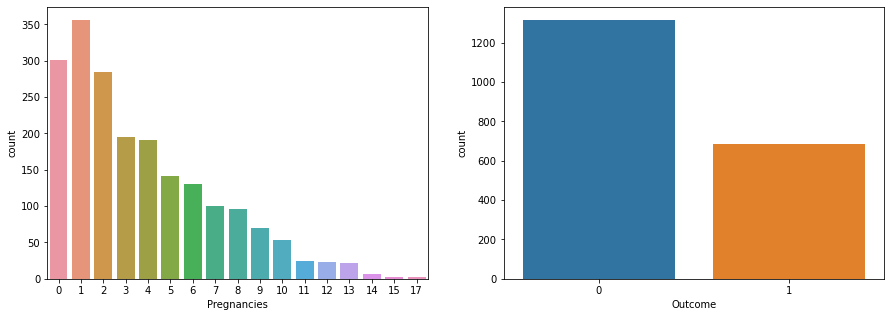

In [10]:
fig=plt.figure(figsize=(15,5))

ax = fig.add_subplot(1,2,1)
sns.countplot(x=df["Pregnancies"])

ax = fig.add_subplot(1,2,2)
sns.countplot(x=df["Outcome"]);

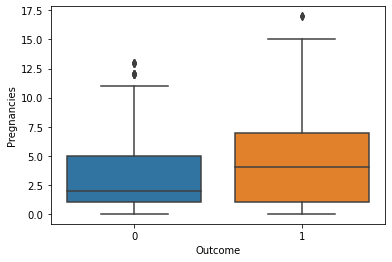

In [11]:
sns.boxplot(x=df['Outcome'], y=df["Pregnancies"], showfliers=True);

La maggior parte dei **`Pregnancies`** sono valori 0, 1 o 2, mentre gli **`Outcome`** come visto precedentemente sono suddivisi in circa 65% non aventi diabete e restante 35% diabetici. Dal BoxPlot notiamo come i positivi abbiano un numero maggiore di maternità, questo ci fa capire come un numero elevato di parti può portare alte probablità di diabete.

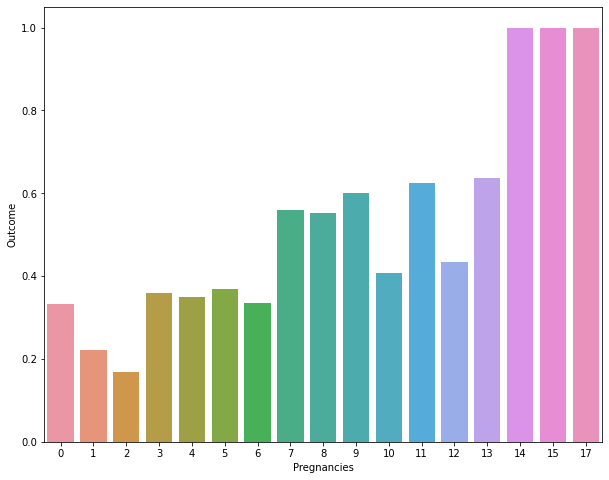

In [12]:
plt.figure(figsize = (10,8))
sns.barplot(x='Pregnancies',y='Outcome',data=df,ci=None);

Da questo grafico viene evidenziato ancora di più il rapporto tra **`Pregnancies`** e **`Outcome`**, e di come al crescere del numero dei parti aumenta la probabilità di essere diabetici.

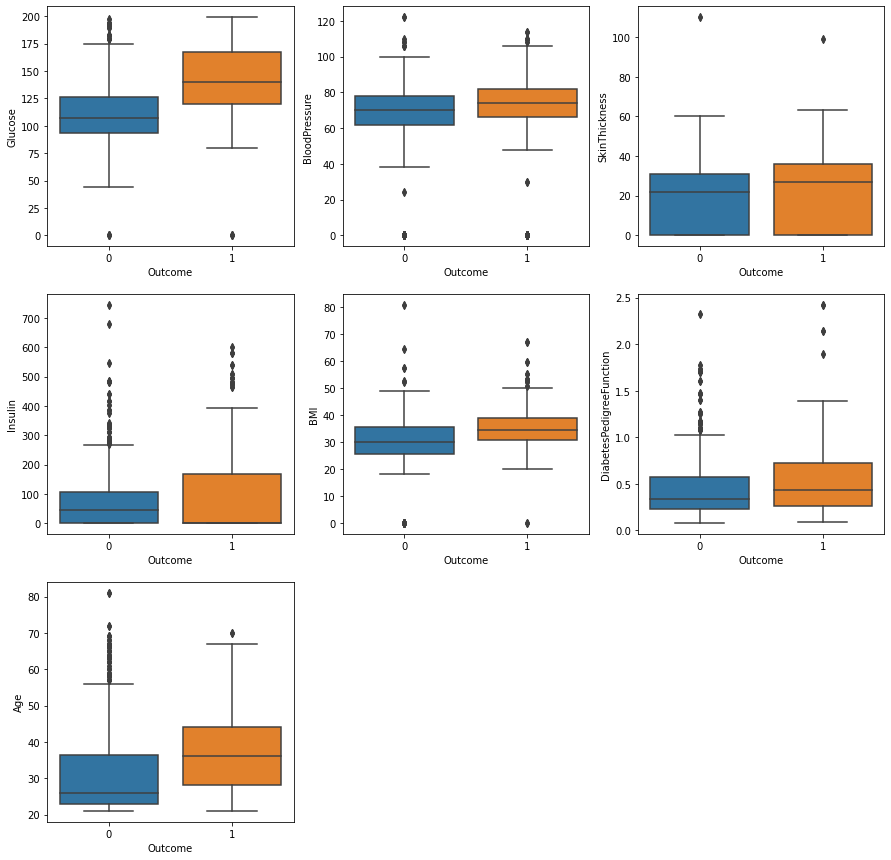

In [13]:
fig=plt.figure(figsize=(15,15))
for i,col in enumerate(df.drop(['Pregnancies','Outcome'],axis=1)):
    ax=fig.add_subplot(3,3,i+1)
    sns.boxplot(y=df[col],x=df['Outcome'], showfliers=True)

I BoxPlot evidenziano la correlazione che c'è tra positivi e negativi rispetto ad ogni features. Inoltre vengono rappresentati valori come mediana, quantili e outliers di ogni features rispetto ad **`Outcome`**. Si può notare già da questi primi grafici che valori alti di glucosio, per esempio, portano ad alte probabilità di essere diabetici.

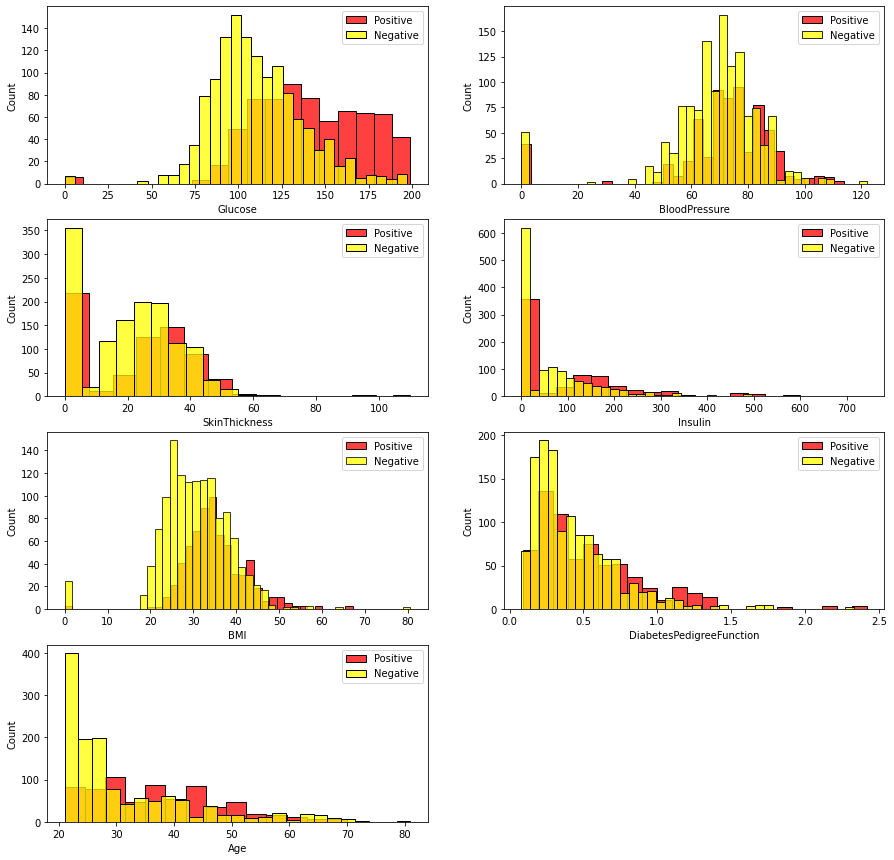

In [14]:
fig=plt.figure(figsize=(15,15))
for i,col in enumerate(df.drop(['Pregnancies','Outcome'],axis=1)):
    ax=fig.add_subplot(4,2,i+1)
    ax1=sns.histplot(x = df[col][df['Outcome']==1],label='Positive',color="red")
    sns.histplot(x = df[col][df['Outcome']==0],label='Negative',ax=ax1, color="yellow")
    plt.legend()

In questi istogrammi vengono messe in correlazione le varie features con la positività/negatività. Si può notare che:
- Le persone che hanno **Glucose** tra 120 e 200 hanno alte probabilità di essere positivi in **Outcome**.
- Le persone che hanno **BloodPressure** tra 70 hanno alte probabilità di essere positivi in **Outcome**.
- Le persone che hanno **SkinThickness** più di 30-35 hanno alte probabilità di essere positivi in **Outcome**.
- Se una persona ha valori in **Insulin** ha un serio rischio di essere positivo in Outcome.
- Persone con **BMI** superiore a 30-35 hanno alte probabilità di avere il diabete.
- Dopo i 30 anni le persone hanno molte probabilità di avere il diabete.

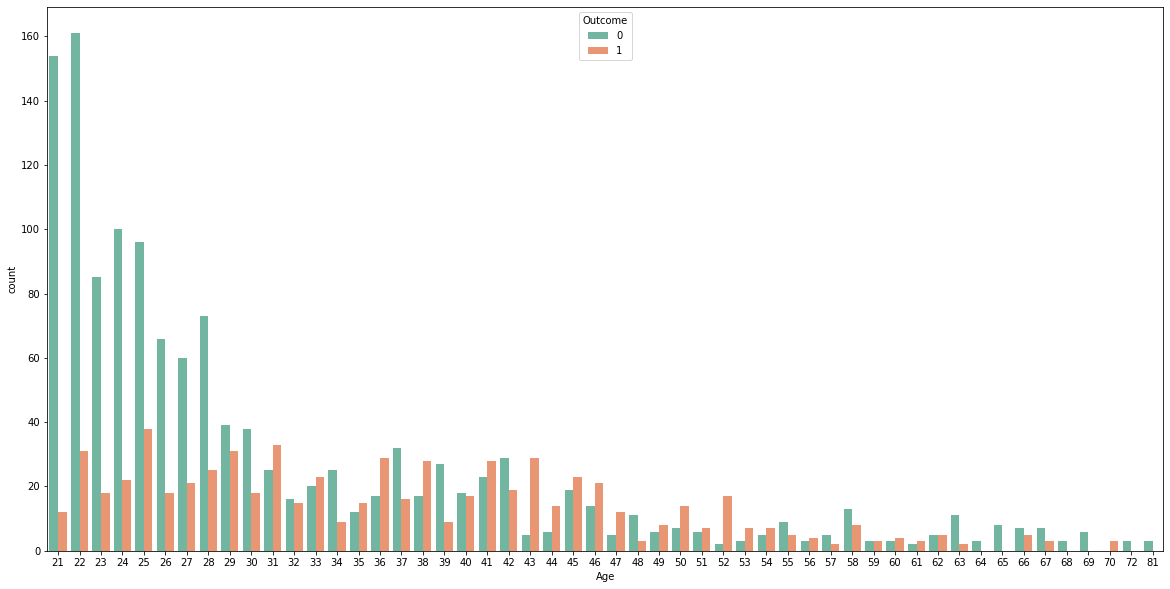

In [15]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 20, 10
sns.countplot(x='Age', hue='Outcome', data = df, palette="Set2");

In questo grafico viene considerata solo la variabile **`Age`** e messa in corrispondenza con **`Outcome`**. Notiamo che tra i 20 e 30 anni nonostante abbiamo più persone i casi diabetici sono nettamente minori dei non diabetici, mentre a partire dai 30 anni all'aumentare dell'età la differenza tra questi due valori diminuisce e in alcuni casi i positivi sono addirittura superiori dei negativi. Questo ci fa dedurre che all'aumentare dell'età aumentano le possibilità di essere diabetici.

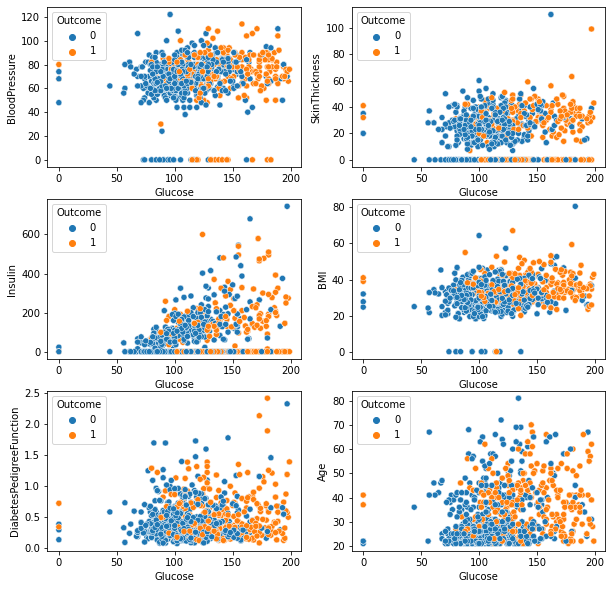

In [16]:
fig = plt.figure(figsize=(10, 10))

for i, columns in enumerate(df.drop(["Pregnancies", "Outcome", "Glucose"], axis=1), start=1):
  ax = fig.add_subplot(3,2,i)
  sns.scatterplot(x = df["Glucose"] , y=df[columns], hue=df["Outcome"])

Si può notare dai grafici a dispersione come il glucosio, anche in combinazione con le altre features sia molto rilevante sulla positività al diabete.

In [17]:
def plot_correlation(dataset):
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    mask = np.zeros_like(dataset, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(11, 9))
    
    sns.heatmap(dataset, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True, square=True, linewidths=.5, cbar_kws={"shrink": .5});

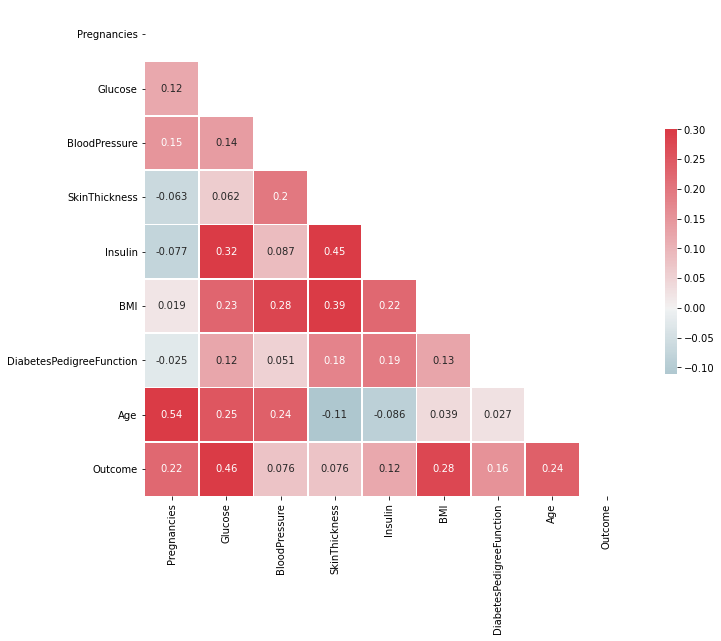

In [18]:
plot_correlation(df.corr())

### Analisi Matrice di correlazione
Dalla matrice di correlazione si possono osservare alcune informazioni rilevanti:

- **`Glucosio`** e **`Outcome`**: La correlazione tra le due features è piuttosto elevata, visto che livelli alti di glucosio portano alla glicemia che può provocare il diabete.

- **`Glucosio`** e **`Insulina`**: come sappiamo l'insulina serve a regolare i livelli di glucosia riducendo la glicemia, di conseguenza queste variabili non possono non essere correlate

- **`Età`** e **`Gravidanze`**: Ovviamente maggiore è l'età, maggiore è la possibilità di avere avuto più gravidanze

- **`BMI`** e **`Spessore della pelle`**: lo spessore della pelle e BMI sono correlati in quanto all'aumentare dell'uno aumenta anche l'altro. Lo spessore della pelle è uno tra i fattori più influenzati dal BMI.

- **`Outcome`** e **`Età`**:  come già notato in precedenza anche l'età influenza la presenza di diabete; maggiore è l'età, maggiore è la possibilità essere diabetici.

### Data Cleaning

In questa senzione andiamo a rimuovere/manipolare tutti i dati che potrebbero alterare l'efficacia del modello; oltre a dati che sono semanticamente scorretti.

Come abbiamo già notato in precedenza andiamo ad escludere tutti quei valori di **`BloodPressure`** non compresi tra i valori "normali" perché potrebbero alterare l'efficacia dei modelli di machine learning.In particolare, andiamo ad azzerare tutti quei valori fuori dal range compreso tra i 40 e i 110 (mm Hg), per poi sostituirli con la media nella fase successiva.

In [19]:
data = df.copy()
data[data.loc[:, "BloodPressure"]<40] = 0 
data[data.loc[:, "BloodPressure"]>110] = 0 
df[df.loc[:, "BloodPressure"]<40] = data
df[df.loc[:,"BloodPressure"]>110] = data

Andiamo, inoltre, ad escludere tutte quelle istanze che hanno come numero di gravidanze **`Pregnancies`** sopra le 10. In questo modo si escludono le persone che hanno effettuato troppe gravidanze e non si "droppano" troppe istanze dal dataset.

In [20]:
indexPreg = df[ df['Pregnancies'] >= 10].index
df.drop(indexPreg, inplace=True)

In [21]:
featureList = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']

In [22]:
df[featureList].isin({0}).sum()

Glucose          117
BloodPressure    104
SkinThickness    550
BMI              113
dtype: int64

In [23]:
for col in featureList:
  df[col] = df[col].replace({ 0 : df[col].mean() })

Abbiamo deciso di rimuovere tutti i valori settati a 0 in **`Glucose`**, **`BloodPressure`**, **`SkinThickness`** e	**`BMI`**, in quanto non utli ai fini dei modelli, sostituendoli con il valore della media di ognuna della feature. 

In [24]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000
mean,3.014392,121.838628,71.856363,26.521846,80.728145,32.456797,0.449971,30.646588,0.307569
std,2.661590,30.007705,11.398613,9.576550,112.475209,6.989114,0.337026,13.595738,0.461610
min,0.000000,44.000000,40.000000,7.000000,0.000000,18.200000,0.000000,0.000000,0.000000
25%,1.000000,100.000000,64.000000,20.509062,0.000000,27.800000,0.232500,23.000000,0.000000
50%,2.000000,114.686034,70.000000,23.000000,40.500000,31.600000,0.361000,28.000000,0.000000
75%,5.000000,139.000000,78.000000,32.000000,130.000000,36.200000,0.605500,38.000000,1.000000
max,9.000000,199.000000,110.000000,99.000000,744.000000,80.600000,2.420000,81.000000,1.000000


Si può notare come il numero di righe totale sia cambiato e per esempio adesso **`BloodPressure`** è compreso nel range adatto e il numero massimo di **`Pregnancies`** non supera più le 10.

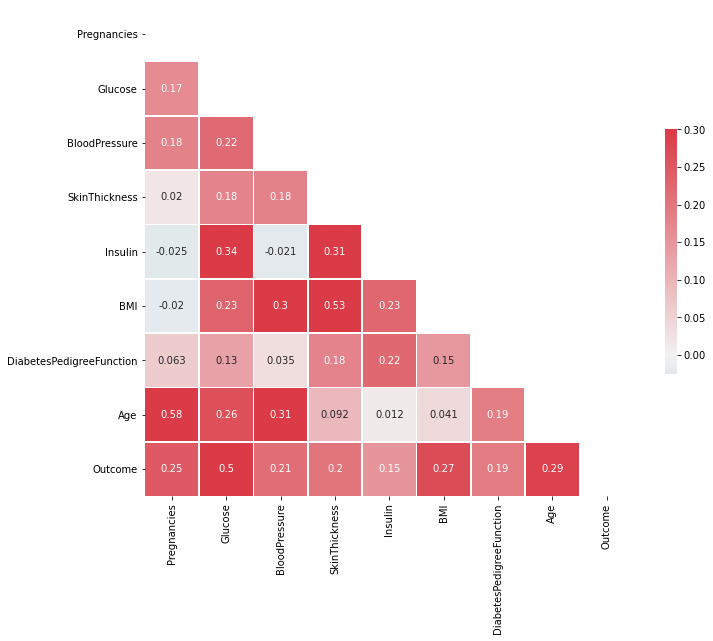

In [25]:
plot_correlation(df.corr())

Possiamo notare come il rapporto tra le varie reference sia leggermente cambiato dopo avere sostituito i valori nulli con la media dei valori ed avere escluso alcune istanze di **`Pregnancies`**.

# Machine Learning
In questa parte andremo ad applicare i dati preprocessati sui vari modelli di conoscenza visti a lezione. Utilezzeremo, in particolare:

Modelli di classificazione:
- **`Perceptron`** 
- **`Logistic Regression`**
- **`Support Vector Machine`**

Modelli basati sugli alberi decisionali:
- **`Decision Tree`**
- **`Random Forest`**

Gradient Boosting:
- **`XGBoost`**

Modello sulla rete neurale:
- **`Rete neurale`**

In [26]:
model_list = ["Perceptron", "Logistic Regression", "SVM", "Random Forest", "XGBoost"]
model_f1_score = []
model_accuracy_score = []

Creiamo delle liste per registrare i valori del f1 score e dell'accuracy di ogni modello, per poterli confrontare alla fine.

In [27]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [28]:
X = df.drop("Outcome", axis = 1)
y = df["Outcome"]

Assegnamo a X il valore di tutte le reference tranne la notra variabile target che verrà invece assegnata a y. 

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=42, stratify=y.values)

Suddividiamo le nostre istanze in training set e validation set utilizzando Hold-Out per dividere i due set assegnando 30% per il validation e 70% per il training.

In [30]:
from statsmodels.stats.proportion import proportion_confint

def confidence_interval(instance, acc, confidence):    
    return proportion_confint(instance * acc, instance, 1-confidence/100, method='wilson')
confidence = 95

Utilizziamo la seguente funzione per valutare i modelli a
regime con calcolo degli intervalli di confidenza predittivi fissata la confidenza del 95%

## Perceptron
Perceptron utilizza la classificazione lineare con un algoritmo simile alla discesa del gradiente per trovare l'iperpiano di separazione migliore.


In [31]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error

In [32]:
kf = StratifiedKFold(5, shuffle=True, random_state=42)

perceptron = Pipeline([
    ('std', StandardScaler()),
    ('perceptron', Perceptron(n_jobs=-1, early_stopping=True, n_iter_no_change=5))
])

grid = {
    'std': [None, StandardScaler()],
    'perceptron__penalty': [None, 'l1', 'l2', "elasticnet"],
    'perceptron__alpha':  np.logspace(-4,1,1),
    'perceptron__tol': np.logspace(-6, 6,3),
    'perceptron__class_weight': [None, "balanced"]
}

perceptron_gs = GridSearchCV(perceptron, grid, cv=kf, n_jobs=-1, scoring='f1')
perceptron_gs = perceptron_gs.fit(X_train, y_train)

Inizializziamo il modello Perceptron su dati inizialmente standardizzati. Viene utilizzata la Grid Search per scoprire i parametri migliori da passare al modello. Si utilizza una k-fold cross validation suddivisa in 5 partizioni randomiche da passare alla funzione GridSearchCV.
Il modello viene quindi addestrato sui dati di training.

In [33]:
perceptron_gs.best_params_

{'perceptron__alpha': 0.0001,
 'perceptron__class_weight': 'balanced',
 'perceptron__penalty': 'l1',
 'perceptron__tol': 1e-06,
 'std': StandardScaler()}

Tramite questa funzione scopriamo i parametri migliori per il modello.

In [34]:
print('Best train score: {:.2f}%'.format(perceptron_gs.best_score_ * 100))
print('Best validation score: {:.2f}%'.format(perceptron_gs.score(X_val, y_val)*100))

Best train score: 58.13%
Best validation score: 59.91%


Stampiamo lo score del modello sul validation set.




In [35]:
lower, upper = confidence_interval(len(X_train),perceptron_gs.score(X_val, y_val),confidence)
print("Intervallo di confidenza: [{:.2f}%, {:.2f}%]".format(lower*100, upper*100) )

Intervallo di confidenza: [57.24%, 62.53%]


Viene valutato l'intervallo di confidenza del modello a regime. 

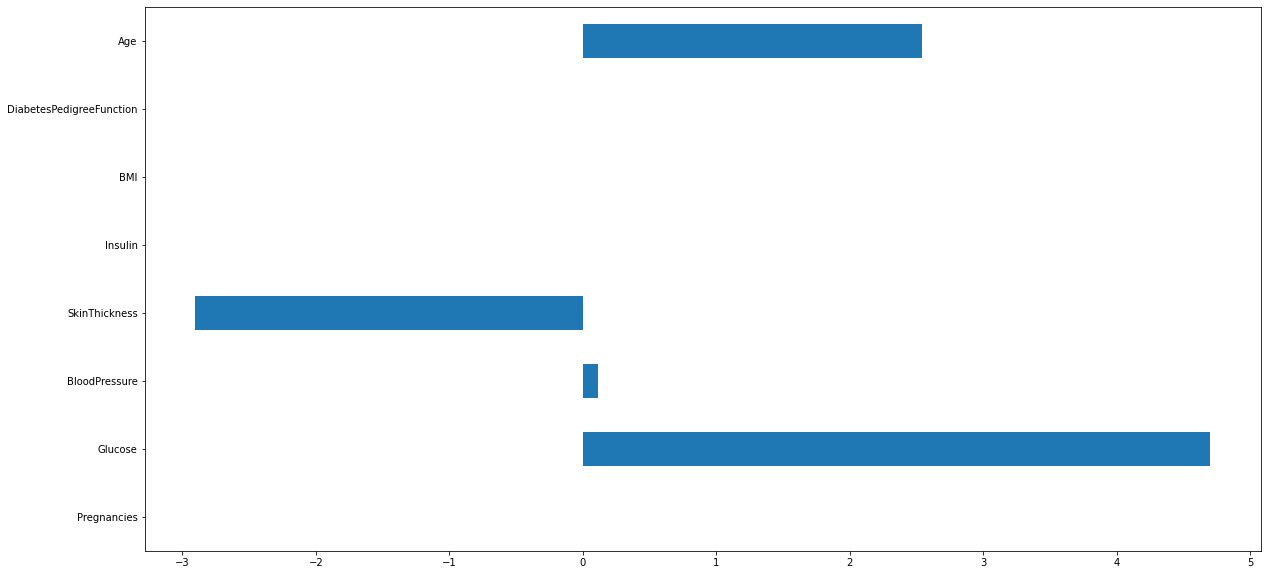

In [36]:
perceptron_img = pd.Series(perceptron_gs.best_estimator_[1].coef_[0], index=X_train.columns)
perceptron_img.plot(kind='barh');

Possiamo osservare che la feature più rilevante per il diabete è sicuramente il glucosio. Infatti, come visto nella fase esplorativa, a valori alti di glucosio si hanno molte positività al diabete.

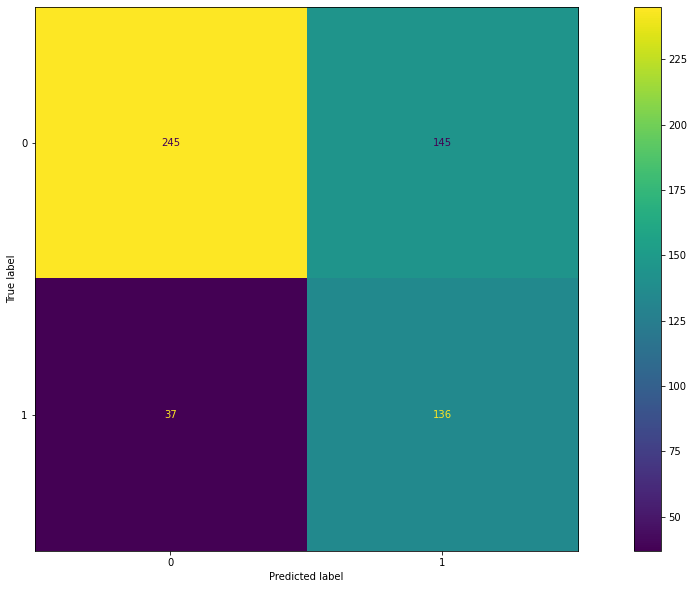

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

y_pred = perceptron_gs.predict(X_val)
cm = confusion_matrix(y_val, y_pred)

plot_confusion_matrix(perceptron_gs, X_val, y_val, values_format="d");

La matrice di confusione indica quali target sono stati etichettati giustamente (valori lungo la diagonale) e quali sono stati, invece etichettati erroneamente. 

In questo caso il modello Perceptron produce una matrice di confusione, nella seconda riga possiamo notare che la prima colonna sono i diabetici predetti erroneamente come non diabetici, mentre la seconda colonna sono i diabetici classificati giustamente.

L'accuratezza si può ottenere dalla matrice di confusione come somma dei valori nella diagonale divisa per la somma complessiva.

In [38]:
pred = perceptron_gs.predict(X_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.87      0.63      0.73       390
           1       0.48      0.79      0.60       173

    accuracy                           0.68       563
   macro avg       0.68      0.71      0.66       563
weighted avg       0.75      0.68      0.69       563



In [39]:
model_f1_score.append(f1_score(y_val, perceptron_gs.predict(X_val)))
model_accuracy_score.append(accuracy_score(y_val, perceptron_gs.predict(X_val)))

Vengono aggiunti alla lista gli f1_score e gli accuracy per il confronto finale tra i modelli.

In [40]:
perceptron_gs_mse = mean_squared_error(y_val, perceptron_gs.predict(X_val))
print('MSE: {}'.format(perceptron_gs_mse))

MSE: 0.32326820603907636


## Logistic Regression
Utilizziamo, ora, un modello di regressione logistica e attraverso una GridSearch si vanno a scoprire gli iperparametri migliori.

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
std_logreg = Pipeline([
    ('std', StandardScaler()),
    ('lr', LogisticRegression(dual=False, penalty = "l1", solver="liblinear"))
])

grid = {
    'lr__tol': np.logspace(-9, 3, 3),
    'lr__C': [0.3, 0.8, 1, 3, 5]
}

logreg_gs = GridSearchCV(std_logreg, grid, cv=kf, n_jobs=-1, return_train_score=True, scoring='f1')
logreg_gs = logreg_gs.fit(X_train, y_train)

In [43]:
logreg_gs.best_params_

{'lr__C': 0.3, 'lr__tol': 1e-09}

In [44]:
print('Best train score: {:.2f}%'.format(logreg_gs.best_score_ * 100))
print('Best validation score: {:.2f}%'.format(logreg_gs.score(X_val, y_val)*100))

Best train score: 60.69%
Best validation score: 64.08%


In [45]:
lower, upper = confidence_interval(len(X_train),logreg_gs.score(X_val, y_val),confidence)
print("Intervallo di confidenza: [{:.2f}%, {:.2f}%]".format(lower*100, upper*100) )

Intervallo di confidenza: [61.44%, 66.63%]


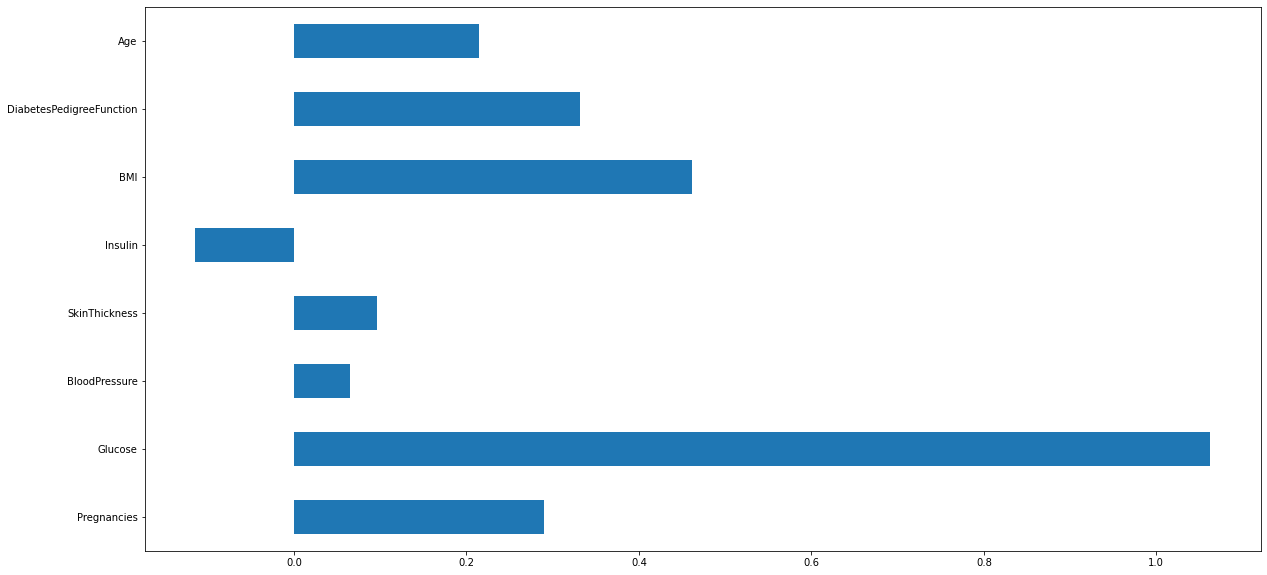

In [46]:
logreg_img = pd.Series(logreg_gs.best_estimator_[1].coef_[0], index=X_train.columns)
logreg_img.plot(kind='barh');

La Logistic Regression rispetto al Perceptron riprendere le stesse features rilevanti, ma vengono maggiormente evidenziate dal modello.

Le features evidenziati sono ragionevoli in quanto, come già evidenziato nell'analisi esplorativa ad esempio al crescere del BMI aumentano le positività in quanto l'obesità portare al diabete.

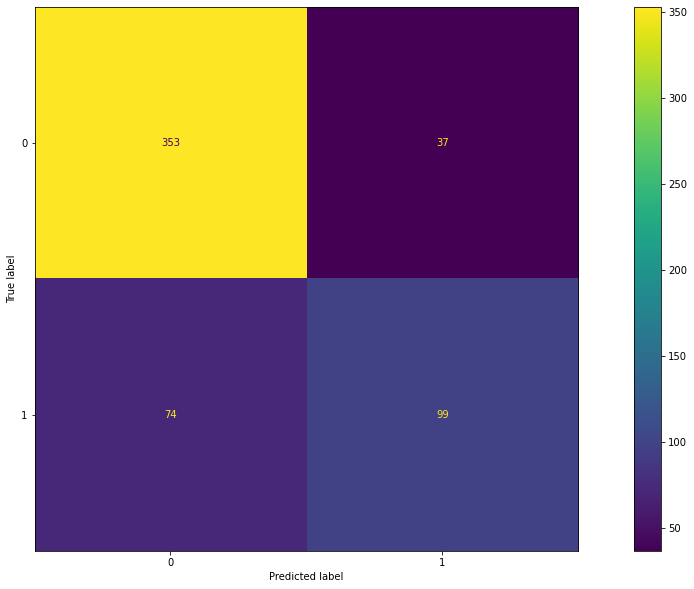

In [47]:
y_pred = logreg_gs.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
plot_confusion_matrix(logreg_gs, X_val, y_val, values_format = "d");

In [48]:
pred = logreg_gs.predict(X_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.86       390
           1       0.73      0.57      0.64       173

    accuracy                           0.80       563
   macro avg       0.78      0.74      0.75       563
weighted avg       0.80      0.80      0.80       563



In [49]:
model_f1_score.append(f1_score(y_val, logreg_gs.predict(X_val)))
model_accuracy_score.append(accuracy_score(y_val, logreg_gs.predict(X_val)))

Vengono aggiunti alla lista gli f1_score e gli accuracy per il confronto finale tra i modelli.

In [50]:
logreg_mse = mean_squared_error(y_val, logreg_gs.predict(X_val))
print('MSE: {}'.format(logreg_mse))

MSE: 0.19715808170515098


### Logistic Regression con bilanciamento delle classi
Visto che le classi sono leggermente sbilanciate proviamo ad applicare un metodo di oversampling (aggiunta di nuovi campioni per fare in modo che le due classi di Outcome non siano sbilanciate).

Serve quindi importare libreria da imblearn.

In [51]:
#!pip install imblearn

In [52]:
from imblearn.over_sampling import SMOTE
balancer = SMOTE(random_state=42)
X_cp = X.copy()
y_cp = df["Outcome"]

X_bal, y_bal = balancer.fit_resample(X_cp, y_cp)

pd.Series(y_bal).value_counts()

1    1299
0    1299
Name: Outcome, dtype: int64

Adesso le due variabili target sono state bilanciate, proviamo quindi ad applicare il modello di regressione logistica sulle nuove variabili target.

In [53]:
model_balanced = LogisticRegression(solver="liblinear", max_iter=10000, C=logreg_gs.best_params_["lr__C"], tol=logreg_gs.best_params_["lr__tol"])
X_t_b, X_v_b, y_t_b, y_v_b = train_test_split(X_bal, y_bal, random_state=42, test_size=1/3)
model_balanced.fit(X_t_b, y_t_b)
model_balanced.score(X_v_b, y_v_b)

print('Best validation score: {:.2f}%'.format(
model_balanced.score(X_v_b, y_v_b)*100))

Best validation score: 75.75%


Notiamo che con il bilanciamento il modello utilizzando gli stessi params del modello precedente migliora l'accuratezza, si dovrebbe essere ridotto l'overfitting.

## Support Vector Machine (SVM)
Le Support Vector Machines sono uno strumento molto potente per individuare iperpiani di separazione ottimi, ovvero quelli che generano minore overfitting. Invece di considerare tutte le istanze, si considerano solo quelle vicine al decision boundary, i cosiddetti Support Vector e si cerca di massimizzare la distanza tra questi punti e l'iperpiano.

Gli iperparametri per SVM sono i seguenti:

- il tipo di funzione kernel da usare.
- C, ovvero un parametro che controlla l'overfitting effettuando uno spostamento dei dati misclassified.
- gamma, ovvero un parametro che controlla quanto il decision boundary sia flessibile (in rbf corrisponde all'ampiezza della gaussiana).

Abilitiamo anche probability=True per abilitare l'utilizzo di predict_proba nel modello finale.


In [54]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

std_svm = Pipeline([
    ('std', StandardScaler()),
    ('svm', SVC(probability = True))
])

grid = {
    'svm__kernel': ['rbf', 'poly'],
    'svm__C': [0.01, 0.1, 1],
}

svm_gs = GridSearchCV(std_svm, grid, cv=kf, n_jobs=-1, return_train_score=True, scoring='f1')
svm_gs = svm_gs.fit(X_train, y_train)

Anche in questo caso andiamo a scoprire tramite GridSearch gli iperparametri migliori.

In [55]:
print('Best parameters:',svm_gs.best_params_)  
print('Best train score: {:.2f}%'.format(svm_gs.best_score_ * 100))
print('Best validation score: {:.2f}%'.format(svm_gs.score(X_val, y_val)*100))

Best parameters: {'svm__C': 1, 'svm__kernel': 'rbf'}
Best train score: 70.19%
Best validation score: 73.48%


Mostriamo gli score e notiamo che sono migliori rispetto al Perceptron e alla Logistic regression.

In [56]:
lower, upper = confidence_interval(len(X_train),svm_gs.score(X_val, y_val),confidence)
print("Intervallo di confidenza: [{:.2f}%, {:.2f}%]".format(lower*100, upper*100))

Intervallo di confidenza: [71.03%, 75.80%]


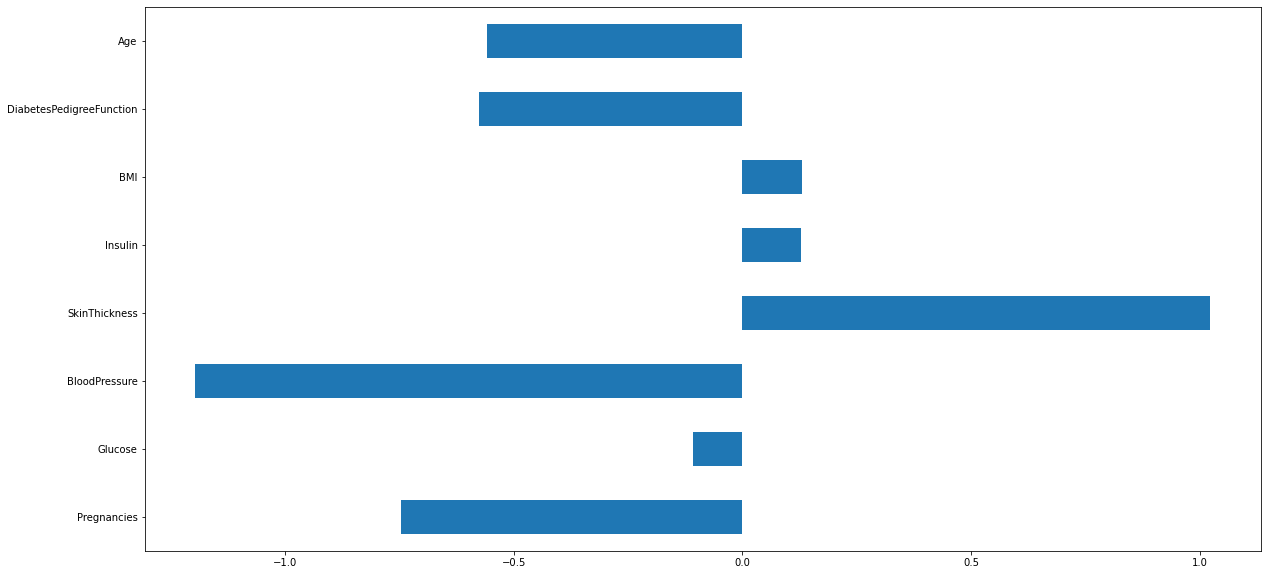

In [57]:
svm_img = pd.Series(svm_gs.best_estimator_[1].support_vectors_[0], index=X_train.columns)
svm_img.plot(kind='barh');

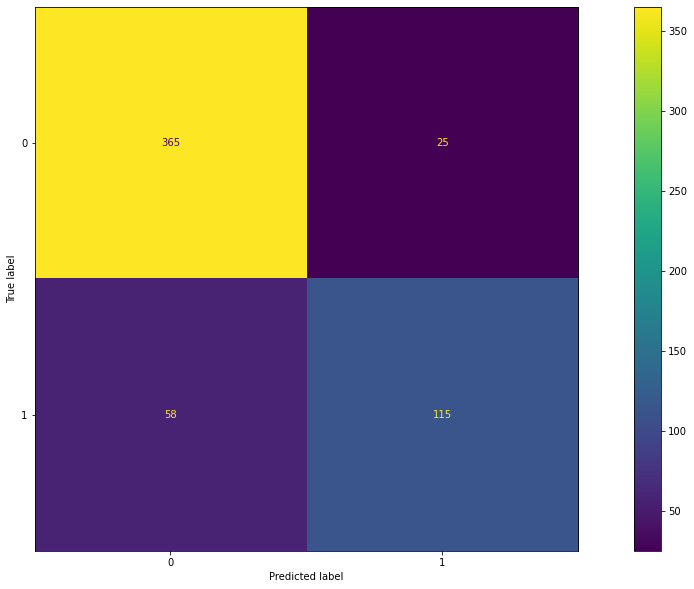

In [58]:
y_pred = svm_gs.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
plot_confusion_matrix(svm_gs, X_val, y_val, values_format = "d");

In [59]:
pred = svm_gs.predict(X_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       390
           1       0.82      0.66      0.73       173

    accuracy                           0.85       563
   macro avg       0.84      0.80      0.82       563
weighted avg       0.85      0.85      0.85       563



In [60]:
model_f1_score.append(f1_score(y_val, svm_gs.predict(X_val)))
model_accuracy_score.append(accuracy_score(y_val, svm_gs.predict(X_val)))

Vengono aggiunti alla lista gli f1_score e gli accuracy per il confronto finale tra i modelli.

In [61]:
svm_mse = mean_squared_error(y_val, svm_gs.predict(X_val))
print('MSE: {}'.format(svm_mse))

MSE: 0.14742451154529307


# Alberi Decisionali
- I modelli di classificazione visti finora si basano su iperpiani descritti da equazioni (lineari o non) su tutte le variabili.
- Gli alberi decisionali costituiscono un approccio differente: la classificazione avviene in base ad una serie di decisioni "semplici", basate ciascuna su una sola variabile:
  - ciascuna decisione porta ad un ramo diverso dell'albero.
  - geometricamente è come se, invece di un unico iperpiano con coefficienti angolari arbitrari, avessimo molteplici iperpiani descritti ciascuno da un'equazione di una sola delle variabili predittive.
- I modelli ad alberi decisionali hanno alcuni vantaggi:
  - un albero decisionale (se di piccole dimensioni) è spesso più facilmente interpretabile da una persona rispetto ad un insieme di coefficienti numerici
  - è concettualmente possibile trattare variabili categoriche (ma in scikit-learn ne è necessario comunque il one-hot encoding)

## Decision Tree

In [62]:
from sklearn.tree  import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 2, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [63]:
from sklearn.tree import export_text
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
print(export_text(model, features))

|--- Glucose <= 120.50
|   |--- Age <= 30.50
|   |   |--- class: 0
|   |--- Age >  30.50
|   |   |--- class: 0
|--- Glucose >  120.50
|   |--- Glucose <= 161.50
|   |   |--- class: 0
|   |--- Glucose >  161.50
|   |   |--- class: 1



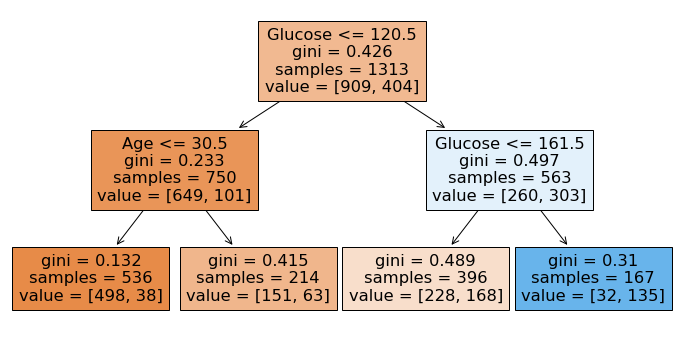

In [64]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,6));
plot_tree(model,feature_names= features, filled = True);

- Specificando `filled=True` in `plot_tree`, è possibile colorare i nodi in base alla classe prevalente e alla purezza:
  - i nodi hanno colore tendente all'azzurro o all'arancione a seconda della classe prevalente
  - il colore è tanto più intenso quanto più è la purezza, ovvero quanto più una classe prevale sull'altra

Proviamo a creare un modello senza max_depth:

In [65]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [66]:
model.get_depth()

15

In [67]:
model.score(X_train, y_train)

1.0

In [68]:
model.score(X_val, y_val)

0.9804618117229129

- Non avendo limiti di profondità, l'albero può essere costruito in modo da classificare alla perfezione tutte le istanze del training set.
- Tuttavia, l'accuratezza sul validation set è diminuita!
- L'impostazione di una profondità massima può essere importante sia per limitare la complessità dell'albero che per evitare l'overfitting, come accade in questo caso.

## Random Forest
Una Random Forest è un classificatore d'insieme ottenuto dall'aggregazione tramite bagging di alberi di decisione. Le foreste casuali si pongono come soluzione che minimizza l'overfitting del training set rispetto agli alberi di decisione.

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

random_forest = Pipeline([
    ('std', StandardScaler()),
    ('rfc', RandomForestClassifier(n_jobs=-1, random_state=3))
])

parameters = {
    'rfc__max_depth': [2, 4, 6],
    'rfc__min_samples_leaf': [1, 2, 3],
    'rfc__min_samples_split': [2, 5, 10],
}
    

random_forest_gs = GridSearchCV(random_forest, parameters, cv=kf, n_jobs=-1, return_train_score=True, scoring='f1')
random_forest_gs = random_forest_gs.fit(X_train, y_train)

Viene creato un modello di Random Forest cercando tra gli iperparametri migliori ed applicando una GridSearch. 

In [70]:
random_forest_gs.best_params_

{'rfc__max_depth': 6, 'rfc__min_samples_leaf': 1, 'rfc__min_samples_split': 2}

In [71]:
print('Best train score: {:.2f}%'.format(random_forest_gs.best_score_ * 100))
print('Best validation score: {:.2f}%'.format(random_forest_gs.score(X_val, y_val)*100))

Best train score: 74.71%
Best validation score: 78.71%


Mostriamo gli score migliori e notiamo che l'accuratezza è cresciuta rispetto ai modelli precedenti, tuttavia il tempo di esecuzione è aumentato considerevolmente in quanto aumenta la complessità del modello.

In [72]:
lower, upper = confidence_interval(len(X_train),random_forest_gs.score(X_val, y_val),confidence)
print("Intervallo di confidenza: [{:.2f}%, {:.2f}%]".format(lower*100, upper*100) )

Intervallo di confidenza: [76.41%, 80.84%]


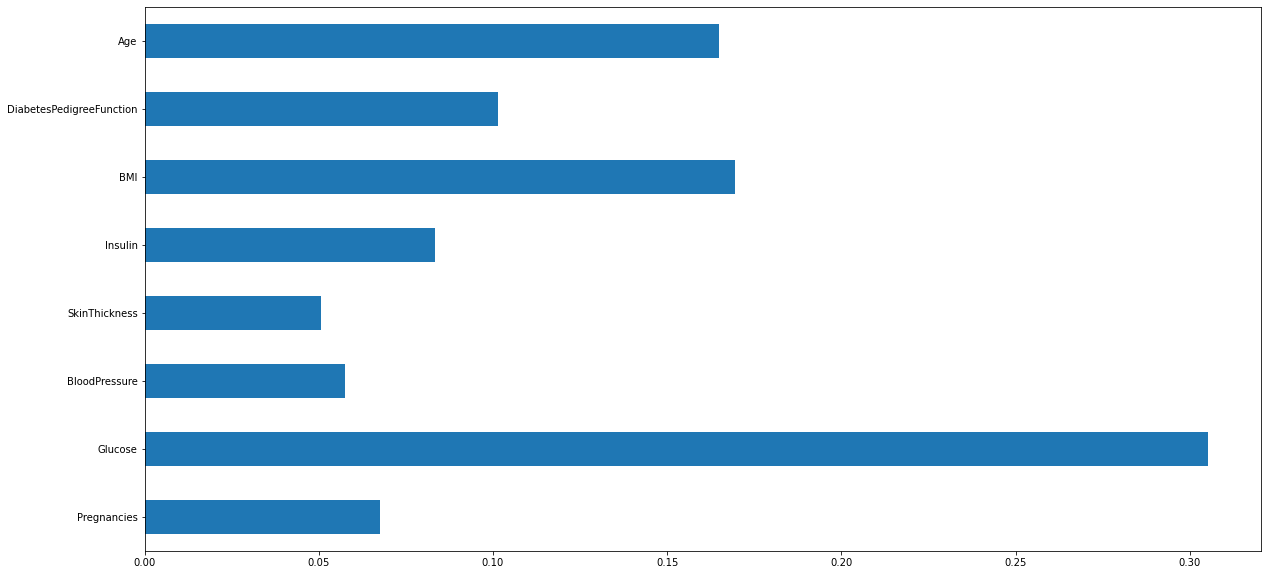

In [73]:
random_forest_img = pd.Series(random_forest_gs.best_estimator_[1].feature_importances_, index=X_train.columns)
random_forest_img.plot(kind='barh');

Notiamo che in questo modello tutte le features prendono rilevanza in quanto la previsione per ogni istanza è la somma delle regressioni predette da ciascun albero semplice.

In particolare le feature Glucose e BMI sono le più rilevanti, questo risulta concordante alle osservazioni fatte nell'esplorazione dei dati in quanto soggetti obesi o con molte quantità di glucosio nel sangue risultano essere diabetici.

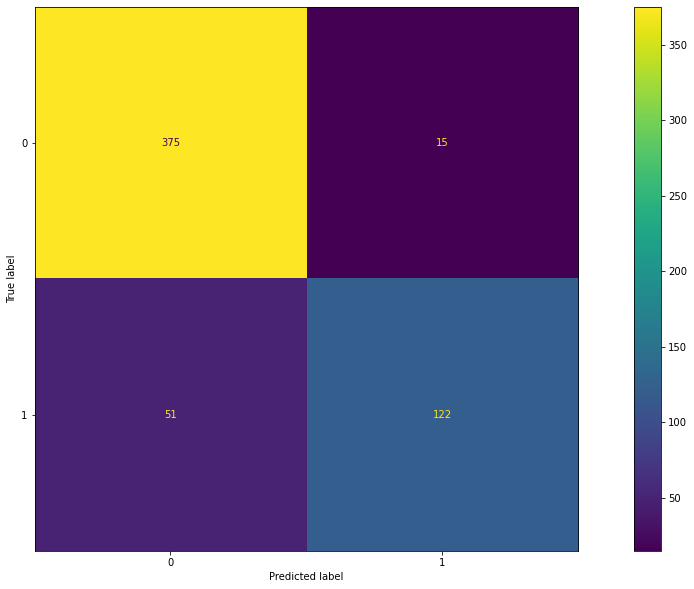

In [74]:
y_pred = random_forest_gs.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
plot_confusion_matrix(random_forest_gs, X_val, y_val, values_format = "d");

In [75]:
pred = random_forest_gs.predict(X_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       390
           1       0.89      0.71      0.79       173

    accuracy                           0.88       563
   macro avg       0.89      0.83      0.85       563
weighted avg       0.88      0.88      0.88       563



In [76]:
model_f1_score.append(f1_score(y_val, random_forest_gs.predict(X_val)))
model_accuracy_score.append(accuracy_score(y_val, random_forest_gs.predict(X_val)))

Vengono aggiunti alla lista gli f1_score e gli accuracy per il confronto finale tra i modelli.

In [77]:
random_forest_mse = mean_squared_error(y_val, random_forest_gs.predict(X_val))
print('MSE: {}'.format(random_forest_mse))

MSE: 0.1172291296625222


## XGBoost
XGBoost è un’implementazione specifica del metodo Gradient Boosting che utilizza approssimazioni più accurate per trovare il miglior modello ad albero.
La formazione di un XGBoost è una procedura iterativa che calcola ad ogni passo la migliore suddivisione possibile per il k-esimo albero elencando tutte le possibili strutture ancora disponibili in quel punto del percorso.

In [78]:
#!pip3 install xgboost

In [79]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

std_xgboost = Pipeline([
    ('std', StandardScaler()),
    ('xgb', XGBClassifier(nthread=8, objective='binary:logistic', use_label_encoder=False, eval_metric="logloss", max_depth=2))
])

parameters = {
    'xgb__eta': [0.001, 0.1, 0.5, 1],
    'xgb__alpha': [0.0001, 0.001, 0.1, 1]
}

xgboost_gs = GridSearchCV(std_xgboost, parameters, cv=3, n_jobs=-1, return_train_score=True, scoring='accuracy')
xgboost_gs = xgboost_gs.fit(X_train, y_train)

Generiamo il modello XGBoost con la ricerca degli iperparametri migliori tramite GridSearch.

In [80]:
xgboost_gs.best_params_

{'xgb__alpha': 1, 'xgb__eta': 1}

In [81]:
print('Best train score: {:.2f}%'.format(xgboost_gs.best_score_ * 100))
print('Best validation score: {:.2f}%'.format(xgboost_gs.score(X_val, y_val)*100))

Best train score: 90.56%
Best validation score: 93.61%


XGBoost è il modello migliore tra quelli visti in quanto ad accuratezza perchè trova il miglior albero di regressione. Il tempo di esecuzione non risulta essere troppo elevato rispetto a Random Forest perchè XGBoost è ottimizzato nella formazione degli alberi. 

In [82]:
lower, upper = confidence_interval(len(X_train),xgboost_gs.score(X_val, y_val),confidence)
print("Intervallo di confidenza: [{:.2f}%, {:.2f}%]".format(lower*100, upper*100) )

Intervallo di confidenza: [92.15%, 94.81%]


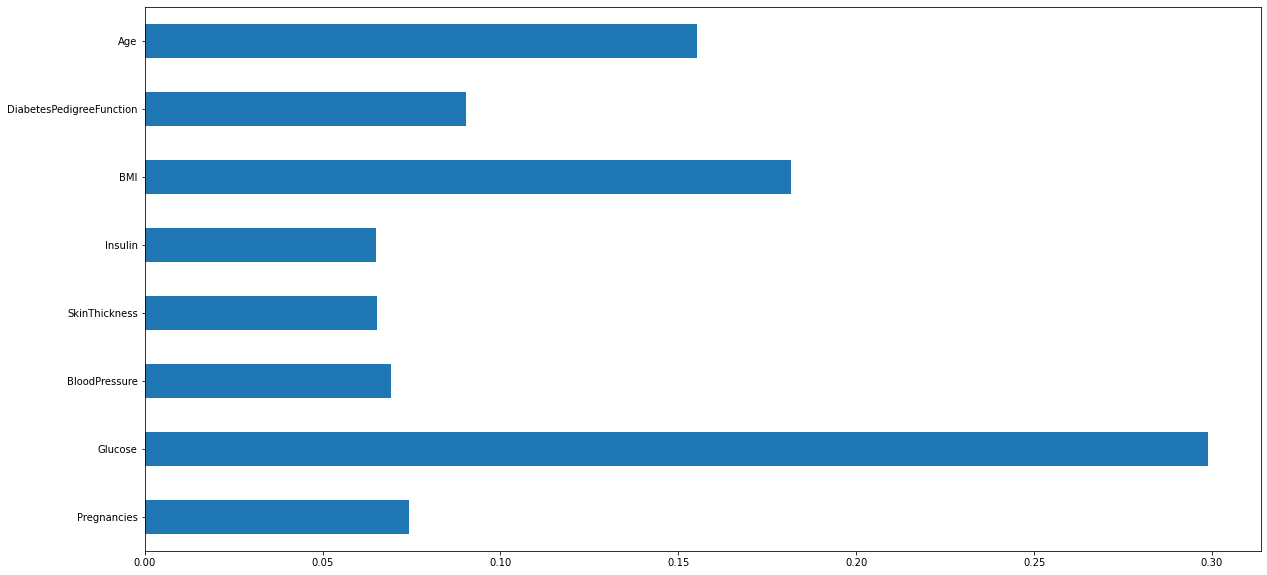

In [83]:
from xgboost import plot_importance

xgboost_img = pd.Series(xgboost_gs.best_estimator_[1].feature_importances_, index=X_train.columns)
xgboost_img.plot(kind='barh');

Come nel Random Forest notiamo come tutte le features abbiano un'importante rilevanza.

Alti livelli di glucosio e di BMI in corelazione anche all'età sono fattori molto influenti sul diabete.

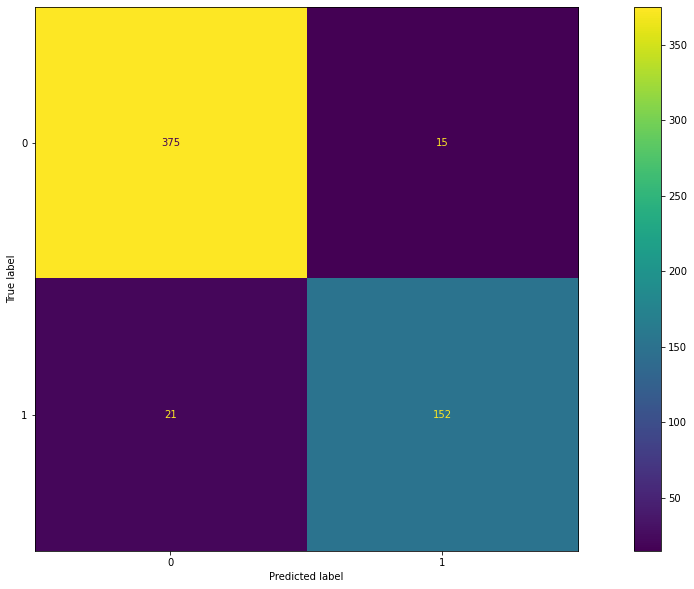

In [84]:
y_pred = xgboost_gs.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
plot_confusion_matrix(xgboost_gs, X_val, y_val, values_format = "d");

In [85]:
pred = xgboost_gs.predict(X_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       390
           1       0.91      0.88      0.89       173

    accuracy                           0.94       563
   macro avg       0.93      0.92      0.92       563
weighted avg       0.94      0.94      0.94       563



In [86]:
model_f1_score.append(f1_score(y_val, xgboost_gs.predict(X_val)))
model_accuracy_score.append(accuracy_score(y_val, xgboost_gs.predict(X_val)))

Vengono aggiunti alla lista gli f1_score e gli accuracy per il confronto finale tra i modelli.

In [87]:
xgboost_mse = mean_squared_error(y_val, xgboost_gs.predict(X_val))
print('MSE: {}'.format(xgboost_mse))

MSE: 0.06394316163410302


## Model Comparison

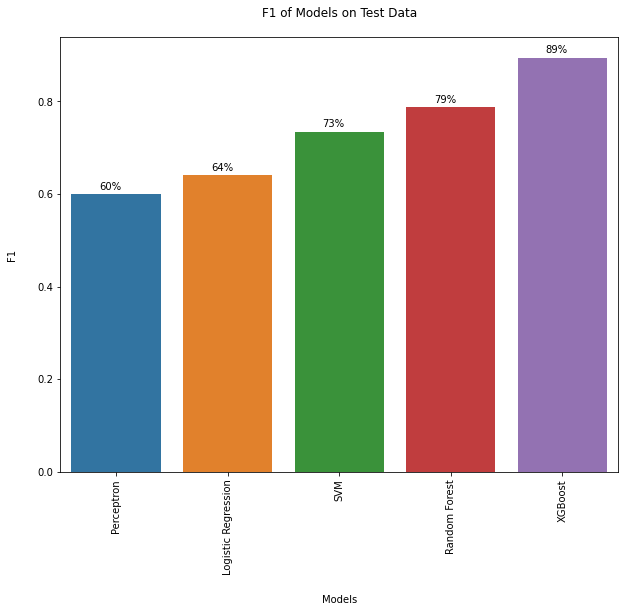

In [88]:
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(x = model_list, y = model_f1_score)
ax.set_title("F1 of Models on Test Data",pad=20)
ax.set_xlabel("Models",labelpad=20)
ax.set_ylabel("F1",labelpad=20)
plt.xticks(rotation=90)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x+0.25, y + height + 0.01));

L'F1 score (nota anche come F-score o F-measure, letteralmente "misura F") è una misura dell'accuratezza di un test. La misura tiene in considerazione precisione e recall del test, dove la precisione è il numero di veri positivi diviso il numero di tutti i risultati positivi. Confrontando i modelli, si può osservare come XGBoost presentano gli F1-score maggiori e sono i modelli migliori, tuttavia potrebbe presentare dell'overfitting. SVM e Random forest presentano dei risultati migliori rispetto a LogisticRegression e Perceptron i quali non considerano i valori missclassified.

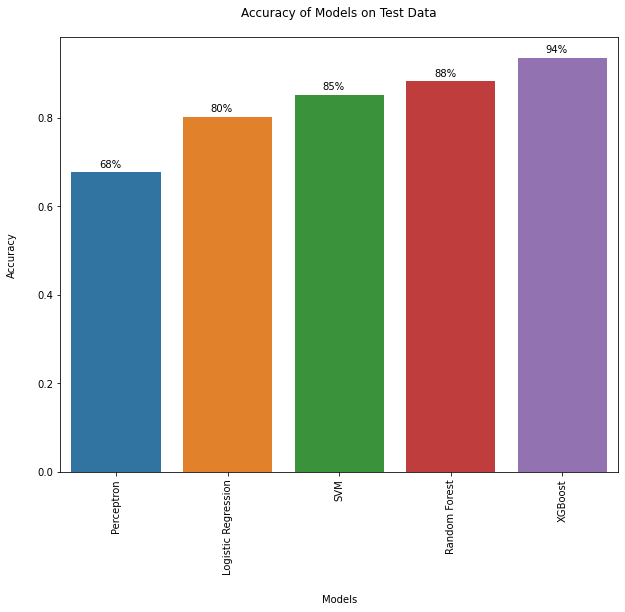

In [89]:
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(x = model_list, y = model_accuracy_score)
ax.set_title("Accuracy of Models on Test Data",pad=20)
ax.set_xlabel("Models",labelpad=20)
ax.set_ylabel("Accuracy",labelpad=20)
plt.xticks(rotation=90)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x+0.25, y + height + 0.01));

L'accuracy del modello viene, invece, calcolata dalle predizioni sul validation. Anche qui, come nel caso precedente, Random Forest e XGBoost sono i modelli migliori, mentre i restanti presentano un'accuratezza che varia tra il 65% e l'90% che si può considerare accettabile.

# Web App con Flask
In questa sezione andremo a sviluppare una semplice interfaccia utente in cui un nuovo paziente, immettendo i propri dati 
può utilizzare un modello di predizione da lui scelto e scoprire cosa predice quest'ultimo in base alle informazioni immesse.

In [90]:
%%writefile predict.py
from flask import Flask, request, render_template
import pickle


app = Flask(__name__)


@app.route("/")
def home():
    return render_template("index.html")

@app.route("/predict")
def predict():
    inputs = [
        float(request.args["glucose"]),
        float(request.args["blood"]),
        int(request.args["age"]),
        float(request.args["skin"]),
        int(request.args["pregnancies"]),
        float(request.args["insulin"]),
        float(request.args["bmi"]),
        float(request.args["dpf"])
    ]
    modello = request.args["model"]
    with app.open_resource(f"{modello}.bin", "rb") as f:
        model = pickle.load(f)
    output = model.predict([inputs])[0]
    response = "Modello: "+f"{modello}; Risultato: Diabetico" if output else f"{modello}; Risultato: Non diabetico"
    return render_template("predict.html", resp=response)


Overwriting predict.py


## Utilizzare un modello nella webapp

- Abbiamo visto finora come addestrare modelli di predizione e come valutarli e/o utilizzarli all'interno della stessa sessione di lavoro.
- In un'applicazione Web ogni richiesta è gestita da un processo separato, per cui non abbiamo accesso ad alcun modello addestrato in precedenza.
  - non possiamo ripetere l'addestramento di un modello ad ogni richiesta, in quanto i tempi di risposta sarebbero lunghi.
- La soluzione è **salvare il modello in un file** una volta addestrato, in modo che possa essere ricaricato ad ogni richiesta in tempi trascurabili.

## Serializzazione di oggetti Python

- Il modulo `pickle` della libreria standard di Python fornisce funzionalità per la (de)serializzazione di oggetti Python.
- Una volta addestrato un modello possiamo **salvarne in un file una rappresentazione binaria**.
- Quando necessario possiamo ricaricare tale rappresentazione dal file e ricostruire da essa il modello addestrato.

In [91]:
import pickle

models = ["perceptron_gs", "logreg_gs", "svm_gs" , "random_forest_gs", "xgboost_gs"]
for x in models:
    model = eval(x)
    with open(f"{x}.bin", "wb") as f:
        pickle.dump(model.best_estimator_, f)

In [92]:
import os
if not os.path.isdir("templates"):
    os.mkdir("templates")

### Form per immissione dati

- Creiamo un form che invii i dati all'URL della funzione `predict`.
  - usiamo la funzione `url_for` di Flask per ottenere tale URL.
- Inseriamo nel form un campo per ciascuna variabile.
  - per `Glucose`, `Blood`, `Age`,`Skin`, `Pregnancies`, `Insulin`, `BMI`, `Dpf` usiamo un campo di tipo numerico, sarà la funzione a convertire il dato nella maniera corretta.
- Poniamo tale form in un template `index.html` da visualizzare come home page.

In [93]:
%%writefile templates/index.html
<DOCTYPE html>
    <html lang="it">

    <head>
        <title>Diabetes dataset classification</title>
    </head>

    <body>
        <header style="padding:5px; background-color: orange; border-radius: 15px; border: 3px #000 solid;">
            <h1 style="text-align: center; font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif;">Diabetes dataset classification</h1>
        </header>
        <form action="{{url_for('predict')}}" method="GET">
            <fieldset style="border: 2px #000 solid; display: inline-block; float: left; margin-right: 0 !important; width: 40%; margin-top: 10px; background-color: white; font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif;">
                <legend style="font-weight: bold;">Inserisci le informazioni personali:</legend>
                <label for="glucose">Glucose:
                    <input style="text-align: left; margin-top: 7px;" type="number" min="0" step="0.01" id="glucose" name="glucose" required/></label><br />
                <label for="blood">Blood pressure:
                    <input style="text-align: left; margin-top: 7px;" type="number" min="0" step="0.01" id="blood" name="blood" required/> (mm Hg)</label><br />
                <label for="age">Age:
                    <input style="text-align: left; margin-top: 7px;" type="number" min="0" id="age" name="age" required/> (anni)</label><br />
                <label for="skin">Skin thickness:
                    <input style="text-align: left; margin-top: 7px;" type="number" min="0" step="0.01" id="skin" name="skin" required/> (mm)</label><br/>
                <label for="pregnancies">Pregnancies:
                    <input style="text-align: left; margin-top: 5px;" type="number" min="0" id="pregnancies" name="pregnancies" required/></label><br />
                <label for="insulin">Insulin:
                    <input style="text-align: left; margin-top: 7px;" type="number" min="0" step="0.01" id="insulin" name="insulin" required/> (mu U/ml)</label><br />
                <label for="bmi">BMI:
                    <input style="text-align: left; margin-top: 7px;" type="number" min="0" step="0.01" id="bmi" name="bmi" required/> kg/(altezza in m)^2</label><br/>
                <label for="dpf">Diabetes Pedigree Function:
                    <input style="text-align: left; margin-top: 7px;" type="number" min="0" step="0.01" id="dpf" name="dpf" required/></label><br/>
                <div style="text-align: center; display: block; margin-top: 30px;">
                    <input type="submit" value="Invia" style="font-weight: bold; height: 40px; width: 100px; background-color: orange; border-radius: 20px; font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif;"/>
                </div>
            </fieldset><br />
            <section style="display: inline-block; float: right; width: 55%; border: 2px #000 solid; margin-top: 2px; padding: 5px; font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif;">
                <form>
                    <label>Scegli un modello:
                    <select name="model">
                    <option value="xgboost_gs">XGBoost</option>
                    <option value="perceptron_gs">Perceptron</option>
                    <option value="logreg_gs">Logistic Regression</option>
                    <option value="svm_gs">SVM</option>
                    <option value="random_forest_gs">Random Forest</option>
                    </select></label>
                </form></br>
                <label name="result">Prediction: {{resp}}</label>
            </section>
            
        </form>
    </body>

    </html>

Overwriting templates/index.html


Reinderizziamo su un'altra pagina uguale alla precedente ma con il risultato della predizione dentro la label resultReinderizziamo su un'altra pagina uguale alla precedente ma con il risultato della predizione dentro una label.

In [94]:
%%writefile templates/predict.html
<DOCTYPE html>
    <html lang="it">

    <head>
        <title>Diabetes dataset classification</title>
    </head>

    <body>
        <header style="padding:5px; background-color: orange; border-radius: 15px; border: 3px #000 solid;">
            <h1 style="text-align: center; font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif;">Diabetes dataset classification</h1>
        </header>
        <form action="{{url_for('predict')}}" method="GET">
            <fieldset style="border: 2px #000 solid; display: inline-block; float: left; margin-right: 0 !important; width: 40%; margin-top: 10px; background-color: white; font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif;">
                <legend style="font-weight: bold;">Inserisci le informazioni personali:</legend>
                <label for="glucose">Glucose:
                    <input style="text-align: left; margin-top: 7px;" type="number" min="0" step="0.01" id="glucose" name="glucose" required/></label><br />
                <label for="blood">Blood pressure:
                    <input style="text-align: left; margin-top: 7px;" type="number" min="0" step="0.01" id="blood" name="blood" required/> (mm Hg)</label><br />
                <label for="age">Age:
                    <input style="text-align: left; margin-top: 7px;" type="number" min="0" id="age" name="age" required/> (anni)</label><br />
                <label for="skin">Skin thickness:
                    <input style="text-align: left; margin-top: 7px;" type="number" min="0" step="0.01" id="skin" name="skin" required/> (mm)</label><br/>
                <label for="pregnancies">Pregnancies:
                    <input style="text-align: left; margin-top: 5px;" type="number" min="0" id="pregnancies" name="pregnancies" required/></label><br />
                <label for="insulin">Insulin:
                    <input style="text-align: left; margin-top: 7px;" type="number" min="0" step="0.01" id="insulin" name="insulin" required/> (mu U/ml)</label><br />
                <label for="bmi">BMI:
                    <input style="text-align: left; margin-top: 7px;" type="number" min="0" step="0.01" id="bmi" name="bmi" required/> kg/(altezza in m)^2</label><br/>
                <label for="dpf">Diabetes Pedigree Function:
                    <input style="text-align: left; margin-top: 7px;" type="number" min="0" step="0.01" id="dpf" name="dpf" required/></label><br/>
                <div style="text-align: center; display: block; margin-top: 30px;">
                    <input type="submit" value="Invia" style="font-weight: bold; height: 40px; width: 100px; background-color: orange; border-radius: 20px; font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif;"/>
                </div>
            </fieldset><br />
            <section style="display: inline-block; float: right; width: 55%; border: 2px #000 solid; margin-top: 2px; padding: 5px; font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif;">
                <form>
                    <label>Scegli un modello:
                    <select name="model">
                    <option value="xgboost_gs">XGBoost</option>
                    <option value="perceptron_gs">Perceptron</option>
                    <option value="logreg_gs">Logistic Regression</option>
                    <option value="svm_gs">SVM</option>
                    <option value="random_forest_gs">Random Forest</option>
                    </select></label>
                </form></br>
                <label name="result">Prediction: {{resp}}</label>
            </section>
            
        </form>
    </body>

    </html>

Overwriting templates/predict.html


- Andare ora alla home page dell'applicazione: http://127.0.0.1:5000/

<img src="diabetes.PNG" /> 

In questa immagine si osserva uno screen dell'interfaccia web, in cui l'utente può inserire i propri dati e testare l'outcome nella all'interno di Risultato. L'utente può scegliere anche tra i vari modelli visti precedentemente.

Nella seguente cella abbiamo lasciato 3 casi, estratti dal validation set, con i quali si possono eseguire dei test dell'applicazione web.

In [95]:
df_X = X_val.copy()
df_y = y_val.copy()
df_X = df_X.tail(3)
df_y = df_y[-3:]
df_X["Outcome"] = df_y
df_X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1409,2,129.0,84.0,20.509062,0,28.0,0.284,27,0
1777,1,144.0,82.0,46.000000,180,46.1,0.335,46,1
43,9,171.0,110.0,24.000000,240,45.4,0.721,54,1


# Rete Neurale


- Una _rete neurale_ è un modello di apprendimento costituito da molteplici strati di nodi elementari.
- Ciascun nodo è in pratica un modello di regressione, i cui input sono forniti dallo strato precedente e il cui output è passato a quello successivo.
  - per modellare relazioni non lineari si applicano agli output dei nodi delle _funzioni di attivazione_, ad es. la funzione _ReLU_.
- Tramite la _backpropagation_, i parametri (pesi e bias) di tutti i nodi sono addestrati congiuntamente per ottimizzare l'errore della rete tramite discesa gradiente stocastica.
  - il training set è iterato molteplici volte (_epoche_), ad ogni iterazione le istanze vengono considerate a gruppi (_minibatch_).
- Ci sono molti aspetti configurabili (_iperparametri_) nella configurazione e nell'addestramento di una rete.
  - struttura della rete: numero di strati, numero di nodi in ciascuno, funzione di attivazione, ...
  - addestramento: batch size, numero di epoche, ...

Utilizziamo le seguenti librerie per il nostro modello di rete neurale:
  - **Keras** come API di alto livello per la costruzione e l'addestramento di reti neurali.
  - **TensorFlow** come backend per la computazione da utilizzare attraverso Keras.
    - usiamo l'API Keras integrata dentro a TensorFlow.

In [96]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [97]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Loss')
    plt.ylim([0,1])
    plt.legend()
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label = 'Val Accuracy')
    plt.ylim([0.4, 1])
    plt.legend()
    
    plt.show()

Nella cella precedente viene definita una funzione per andare a disegnare nei grafici le funzioni di loss e di accuracy su train e validation in ogni epoca.

In [98]:
scaler_X = StandardScaler()
std_X_train = scaler_X.fit_transform(X_train.astype(float))
std_X_val = scaler_X.transform(X_val)

Andiamo a standardizzare i dati da passare in input al rete neurale.

In [99]:
def neural_network():
    model = Sequential([
        Dense(64, activation="relu", input_shape=[X_train.shape[1]]),
        Dropout(0.5),
        Dense(1, activation="sigmoid")
    ])
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [100]:
model = neural_network()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                576       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


Definiamo la precedente funzione per andare a costruire un modello di rete neurale costuito da 64 nodi nel primo strato con la funzione "Relu" e un nodo con funzione sigmoid nell'ultimo strato di output. 

In totale il modello presenta 641 parametri dati dati:
- 8x64 = 512 pesi più 64 bias
- 64x1 = 64 pesi più 1 bias

Per la classificazione, impostiamo `binary_crossentropy` come misura dell'errore
  l'errore è tanto più alto quanto più la probabilità stimata per la classe corretta si allontana da 100%.

In aggiunta alla metrica dell'errore da ottimizzare, possiamo aggiungere altre metriche di valutazione che vogliamo misurare (`metrics`).
  - calcoliamo l'`accuracy`, ovvero la percentuale di esempi classificati correttamente.

- Il _dropout_, applicato nell'addestramento della rete, azzera ad ogni batch alcuni input casuali in uno strato.
  - in fase di predizione (inferenza) non cambia nulla.
- In questo modo la rete si addestra su informazioni incomplete, con possibile riduzione dell'overfitting.
- Introduciamo dopo il primo strato nascosto uno strato `Dropout`, in cui specifichiamo la frazione di input da azzerare 
  - lo strato dropout è "astratto", non introduce nuovi nodi o nuovi parametri da addestrare.

In [101]:
history = model.fit(std_X_train, y_train, validation_split=0.3, batch_size=100, epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 114ms/step - loss: 0.7109 - accuracy: 0.5698 - val_loss: 0.6702 - val_accuracy: 0.5964
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6559 - accuracy: 0.6363 - val_loss: 0.6190 - val_accuracy: 0.6599
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6160 - accuracy: 0.6798 - val_loss: 0.5798 - val_accuracy: 0.7081
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5744 - accuracy: 0.7169 - val_loss: 0.5500 - val_accuracy: 0.7310
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5351 - accuracy: 0.7513 - val_loss: 0.5266 - val_accuracy: 0.7386
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5241 - accuracy: 0.7555 - val_loss: 0.5089 - val_accuracy: 0.7462
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5097 - accuracy: 0.7593 - val_loss: 0.4948 - val_accuracy: 0.7487
Epoch 8/100

10/10 [==============================] - 0s 4ms/step - loss: 0.4107 - accuracy: 0.7878 - val_loss: 0.4131 - val_accuracy: 0.7893
Epoch 59/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3817 - accuracy: 0.8078 - val_loss: 0.4130 - val_accuracy: 0.7893
Epoch 60/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3832 - accuracy: 0.8136 - val_loss: 0.4127 - val_accuracy: 0.7893
Epoch 61/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3970 - accuracy: 0.8089 - val_loss: 0.4121 - val_accuracy: 0.7893
Epoch 62/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3798 - accuracy: 0.8122 - val_loss: 0.4114 - val_accuracy: 0.7893
Epoch 63/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3870 - accuracy: 0.8217 - val_loss: 0.4109 - val_accuracy: 0.7893
Epoch 64/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4082 - accuracy: 0.8018 - val_loss: 0.4103 - val_accuracy: 0.7868
Epoch 65/100
10/10 

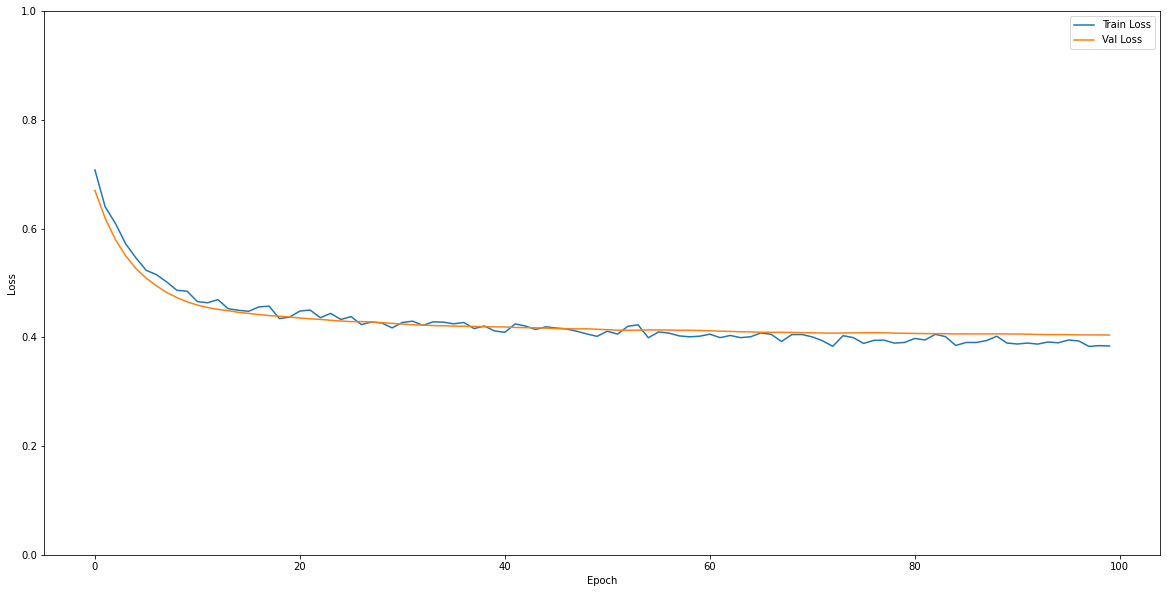

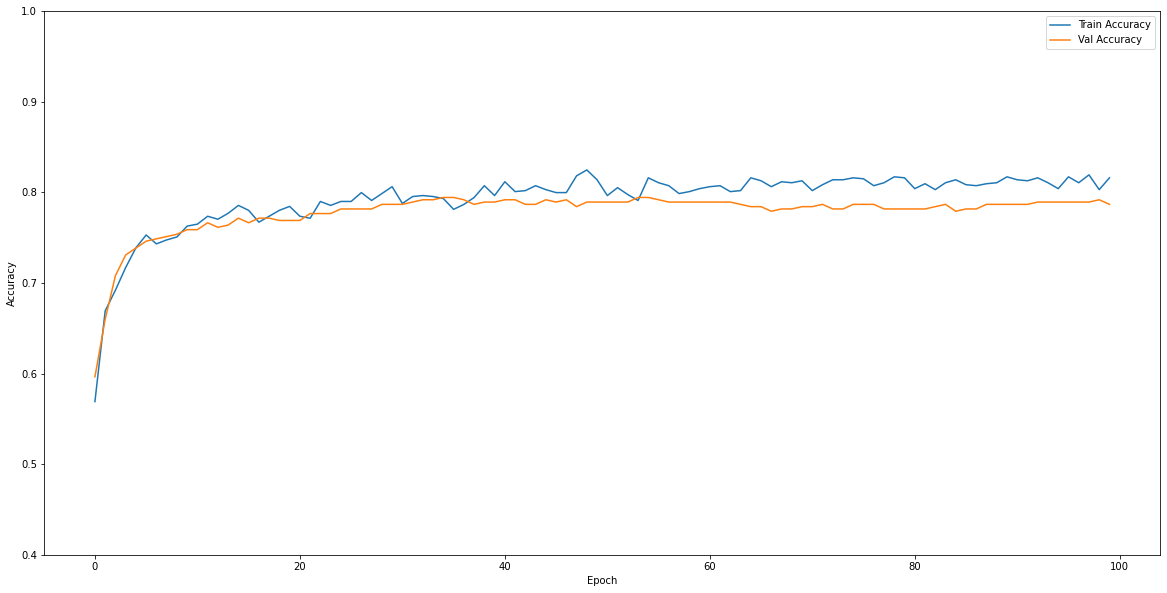

In [102]:
hist = pd.DataFrame(history.history)
plot_history(history)

- Durante l'addestramento, l'errore sul training set, mostrato come `loss`, si riduce progressivamente.
- L'accuratezza invece migliora man mano che aumenta il numero di epoche.

In [103]:
model.evaluate(scaler_X.transform(X_val), y_val, batch_size=100)

6/6 [==============================] - 0s 3ms/step - loss: 0.3813 - accuracy: 0.8099


[0.3813187777996063, 0.8099467158317566]

- Con `evaluate` calcoliamo tutte le misure indicate in `compile`, ovvero la cross entropy e l'accuratezza

In [104]:
y_pred = model.predict(scaler_X.transform(X_val))
y_pred =(y_pred > 0.5)

- Con `predict` otteniamo l'output "grezzo" della rete a fronte di input dati, ovvero le probabilità delle due classi.
- Andiamo ad analizzare solamente le classi con probabilità che siano state etichettate correttamente maggiore del 50%, le altre le escludiamo.
- Andiamo a stampare alcune misure per l'accuratezza del modello come precision, recall, f1-score e support.

In [105]:
pred = model.predict(scaler_X.transform(X_val))
pred = (pred > 0.5)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       390
           1       0.74      0.60      0.66       173

    accuracy                           0.81       563
   macro avg       0.79      0.75      0.76       563
weighted avg       0.80      0.81      0.80       563



L'accuratezza assume valori indicativamente compresi tra 85% e 90% (suscettibili di casualità)